In [4]:
# Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, classification_report, auc
from numpy import argmax

In [6]:
# Генерация датасета и разделение на обучающую и тестовую выборки
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [8]:
# Обучение модели логистической регрессии
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

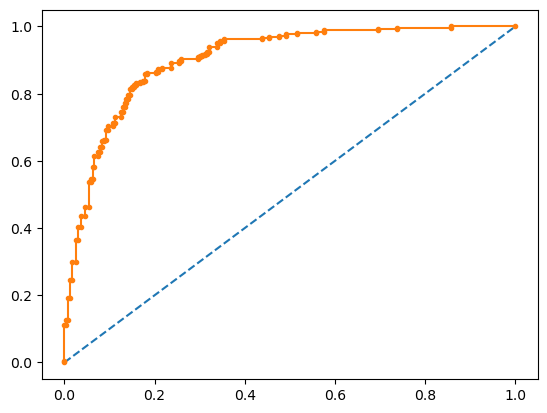

In [10]:
# Построение ROC-кривой
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [12]:
# Вычисление ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.9027724358974359


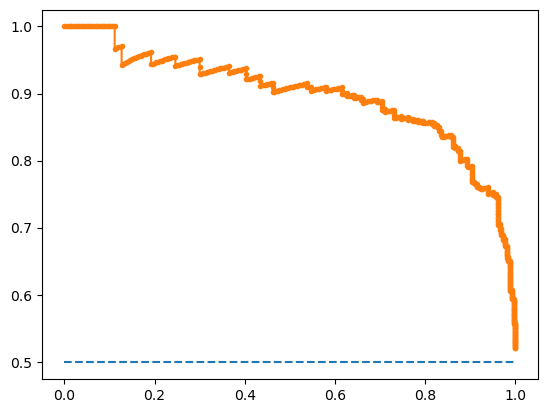

In [14]:
# Построение PR-кривой
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [16]:
# Вычисление PR-AUC
pr_auc = auc(recall, precision)
print("PR-AUC:", pr_auc)

PR-AUC: 0.897662372903334


In [18]:
# Отчет о классификации
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       240
           1       0.84      0.85      0.84       260

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



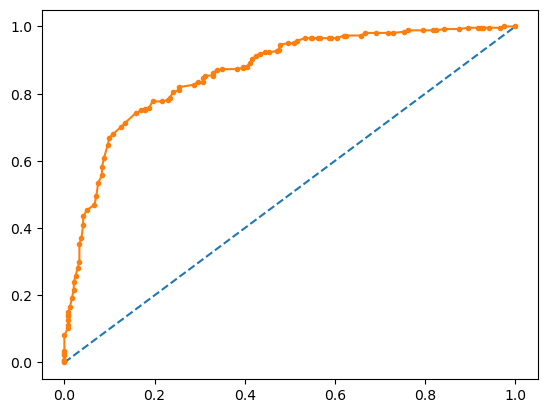

ROC-AUC для KNN: 0.8630608974358974


In [20]:
# Сравнение с другой моделью (KNN)
model2 = KNeighborsClassifier(n_neighbors=250).fit(X_train, y_train)
y_pred2_proba = model2.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred2_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

roc_auc2 = roc_auc_score(y_test, y_pred2_proba[:, 1])
print("ROC-AUC для KNN:", roc_auc2)

In [22]:
# Работа с несбалансированными данными
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=492, Class1=8
Тестовая: Class0=493, Class1=7


In [24]:
# Обучение модели на несбалансированных данных
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       493
           1       0.00      0.00      0.00         7

    accuracy                           0.98       500
   macro avg       0.49      0.50      0.50       500
weighted avg       0.97      0.98      0.98       500



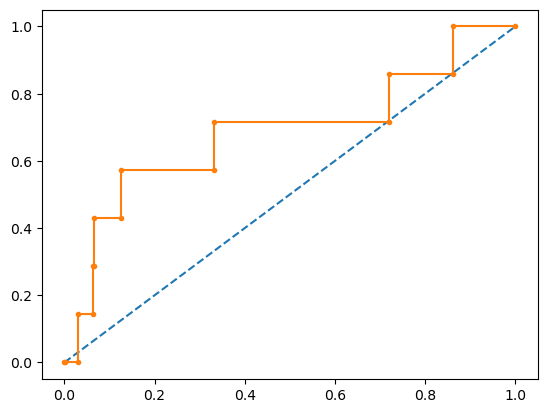

In [26]:
# ROC-кривая для несбалансированных данных
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

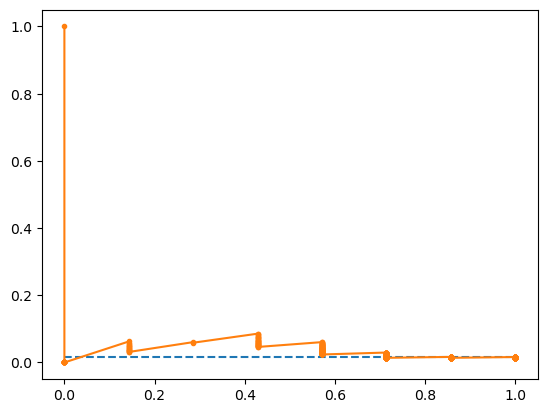

In [28]:
# PR-кривая для несбалансированных данных
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [30]:
# Оптимизация порога по F1-метрике
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
f1 = (2 * p * r) / (p + r)
ix = argmax(f1)
best_threshold = pr_thresholds[ix]
print('Порог=%f, F-Score=%.3f' % (best_threshold, f1[ix]))

Порог=0.155050, F-Score=0.441


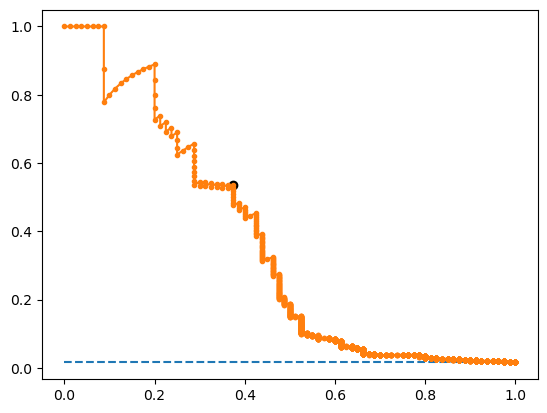

In [32]:
# Визуализация лучшего порога на PR-кривой
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.show()

In [34]:
# Сравнение классификации с оптимальным порогом и порогом по умолчанию
y_pred_optimal = (y_pred_proba[:, 1] > best_threshold).astype('int')
print("С оптимальным порогом:")
print(classification_report(y_test, y_pred_optimal))

y_pred_default = model.predict(X_test)
print("\nС порогом по умолчанию:")
print(classification_report(y_test, y_pred_default))

С оптимальным порогом:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4920
           1       0.53      0.36      0.43        80

    accuracy                           0.98      5000
   macro avg       0.76      0.68      0.71      5000
weighted avg       0.98      0.98      0.98      5000


С порогом по умолчанию:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       1.00      0.09      0.16        80

    accuracy                           0.99      5000
   macro avg       0.99      0.54      0.58      5000
weighted avg       0.99      0.99      0.98      5000

